In [5]:
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

from matplotlib import rcParams
import matplotlib.pyplot as plt
from general.metrics import plot_confusion_matrix
import appliances.classA
import warnings

from __future__ import print_function, division
warnings.filterwarnings('ignore')
%matplotlib inline

rcParams['figure.figsize'] = (13, 6)

initialize Class A dataset...


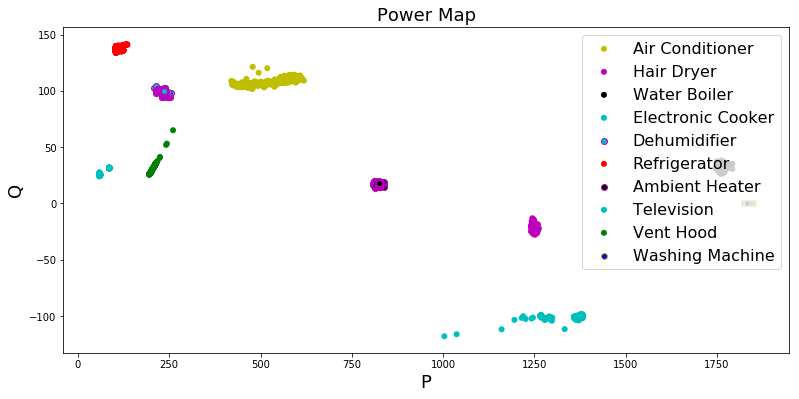

In [6]:
#%% Load Group A Appliances Dataset
classA_dataset = appliances.classA.dataset()
classA_dataset.plot()
features, classes = classA_dataset.load()

In [7]:
#Define Class Name for Confusion Matrix
class_names = np.array(["Air Conditioner", "Water Boiler", "Hair Dryer", "Electronic Cooker", "Dehumidifier", "Refrigerator", "Ambient Heater", "Television", "Vent Hood", "Washing Machine"])

#%% dividing X, y into train and test data
X_train, X_test, y_train, y_test = train_test_split(features, classes, test_size = 0.2, random_state = 0)

SVM Training...
Runtime = 0.017499923706054688 seconds.
SVM Prediction...
Runtime = 0.002000093460083008 seconds.


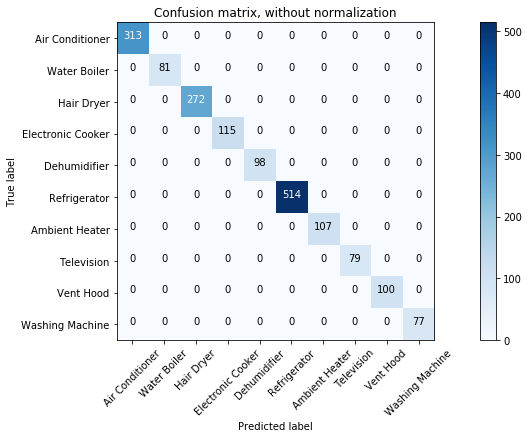

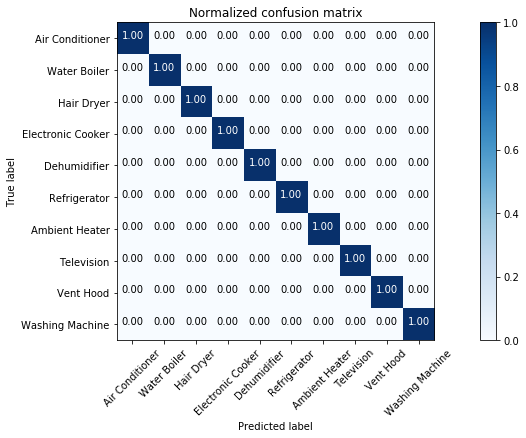

1.0

In [8]:
#%% Train the SVM Classifier
#Import Library
from sklearn.svm import SVC
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
svc = svm.SVC(C=1.0, kernel='poly', degree=2, gamma='auto', coef0=0.0, 
          shrinking=True, probability=False, tol=0.001, cache_size=200, 
          class_weight=None, verbose=False, max_iter=-1, random_state=None)
start = time.time()
print("SVM Training...")
svc.fit(X_train, y_train)
end = time.time()
print("Runtime =", end-start, "seconds.")

start = time.time()
print("SVM Prediction...")
y_pred = svc.predict(X_test)
end = time.time()
print("Runtime =", end-start, "seconds.")
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix, without normalization')
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True, title='Normalized confusion matrix')
plt.show()
#f1_score(y_test, y_pred, average='macro')  
#f1_score(y_test, y_pred, average='micro')  
f1_score(y_test, y_pred, average='weighted')  
#f1_score(y_test, y_pred, average=None)  

Naive Bayes Training...
Runtime = 0.006999969482421875 seconds.
Naive Bayes Prediction...
Runtime = 0.0014998912811279297 seconds.


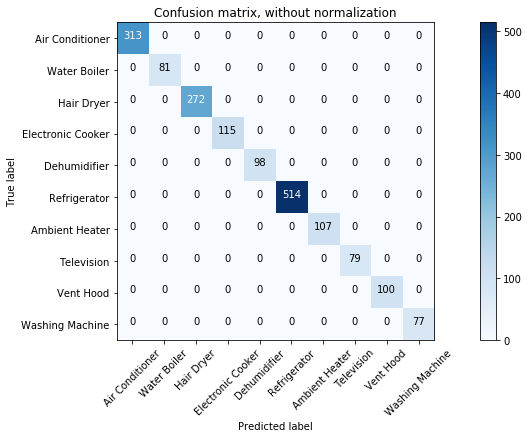

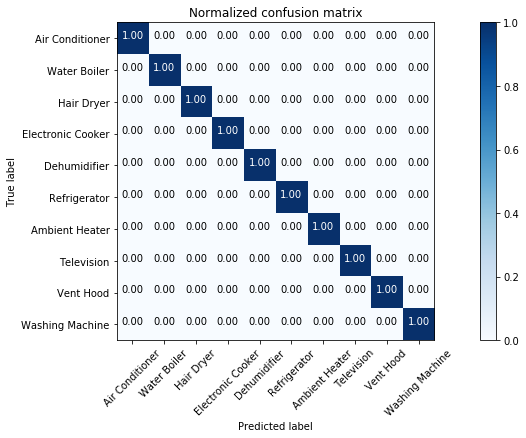

1.0

In [9]:
#%% Train the Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB

start = time.time()
print("Naive Bayes Training...")
gnb = GaussianNB().fit(X_train, y_train)
end = time.time()
print("Runtime =", end-start, "seconds.")

start = time.time()
print("Naive Bayes Prediction...")
y_pred = gnb.predict(X_test)
end = time.time()
print("Runtime =", end-start, "seconds.")
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix, without normalization')
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True, title='Normalized confusion matrix')
plt.show()
f1_score(y_test, y_pred, average='weighted')  

initialize Class A composite signals...


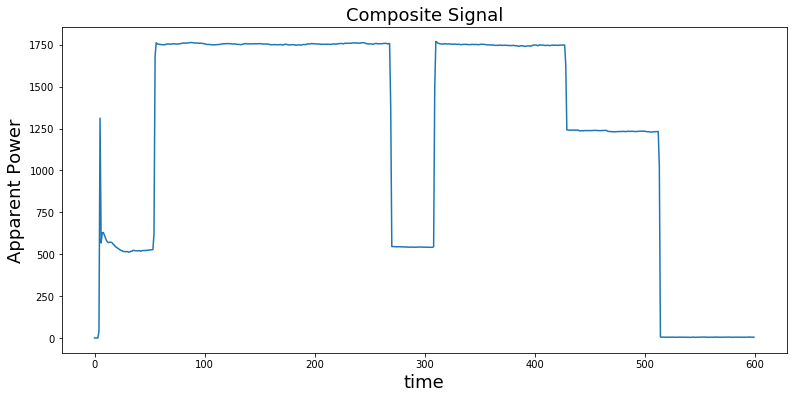

SVM:
at t = 4 Switched ON: ['Air Conditioner']
at t = 55 Switched ON: ['Hair Dryer']
at t = 269 Switched OFF: ['Hair Dryer']
at t = 309 Switched ON: ['Hair Dryer']
at t = 428 Switched OFF: ['Air Conditioner']
at t = 513 Switched OFF: ['Hair Dryer']
filename       precision      recall         f1-score       
data/AC_D.csv  0.995073       0.995000       0.994999       


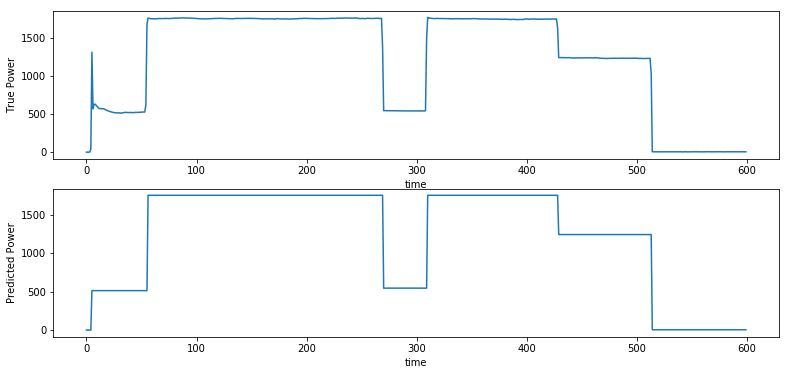

In [14]:
#%% Disaggregation
composite_signal = appliances.classA.composite('data/AC_D.csv')
print ('SVM:')
composite_signal.disaggrate(svc)
#print ('Naive Bayes:')
#composite_signal.disaggrate(gnb)

initialize Class A composite signals...


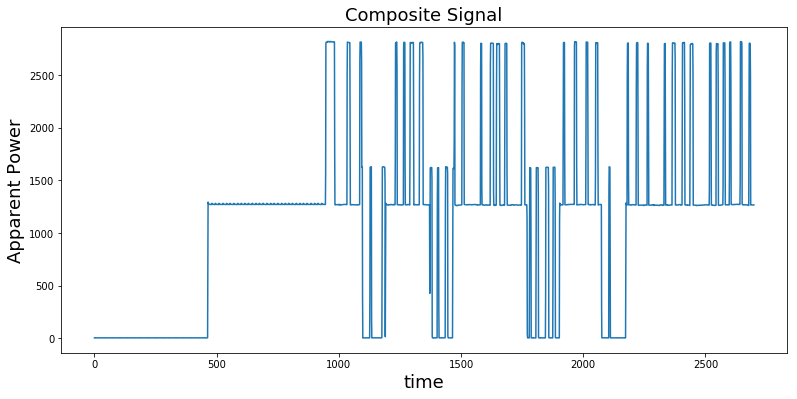

SVM:
at t = 464 Switched ON: ['Hair Dryer']
at t = 1097 Switched OFF: ['Hair Dryer']
at t = 1191 Switched ON: ['Hair Dryer']
at t = 1381 Switched OFF: ['Hair Dryer']
at t = 1466 Switched ON: ['Hair Dryer']
at t = 1780 Switched OFF: ['Hair Dryer']
at t = 1903 Switched ON: ['Hair Dryer']
at t = 2075 Switched OFF: ['Hair Dryer']
at t = 2174 Switched ON: ['Hair Dryer']
filename       precision      recall         f1-score       
data/B_I3.csv  0.958990       0.956280       0.956823       


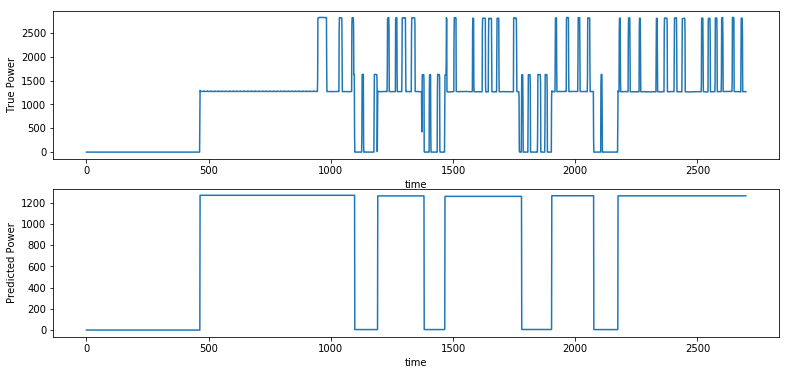

In [15]:
#%% Hair Dryer & Clothes Iron
composite_signal = appliances.classA.composite('data/B_I3.csv')
print ('SVM:')
composite_signal.disaggrate(svc)
#print ('Naive Bayes:')
#composite_signal.disaggrate(gnb)

initialize Class A composite signals...


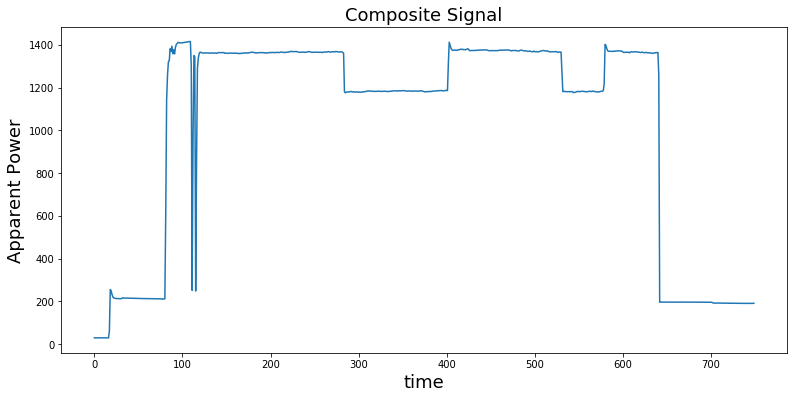

Naive Bayes:
at t = 17 Switched ON: ['Vent Hood']
at t = 117 Switched ON: ['Electronic Cooker']
at t = 283 Switched OFF: ['Vent Hood']
at t = 402 Switched ON: ['Vent Hood']
at t = 531 Switched OFF: ['Vent Hood']
at t = 579 Switched ON: ['Vent Hood']
at t = 641 Switched OFF: ['Electronic Cooker']
filename       precision      recall         f1-score       
data/C_V.csv   0.954151       0.945333       0.946603       


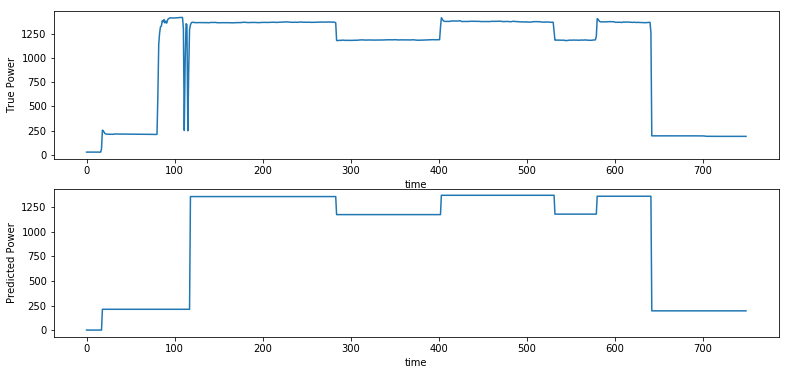

In [16]:
#%% Vent Hood & Electronic Cooker
composite_signal = appliances.classA.composite('data/C_V.csv')
#print ('SVM:')
#composite_signal.disaggrate(svc)
print ('Naive Bayes:')
composite_signal.disaggrate(gnb)

initialize Class A composite signals...


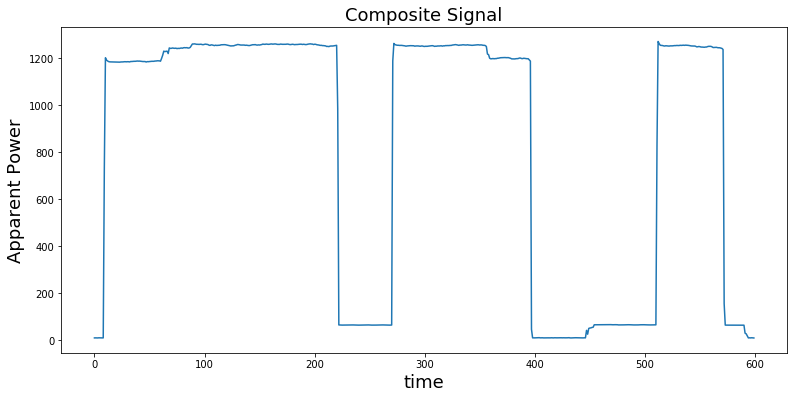

SVM:
at t = 9 Switched ON: ['Hair Dryer']
at t = 61 Switched ON: ['Television']
at t = 221 Switched OFF: ['Hair Dryer']
at t = 271 Switched ON: ['Hair Dryer']
at t = 356 Switched OFF: ['Television']
at t = 396 Switched OFF: ['Hair Dryer']
at t = 446 Switched ON: ['Television']
at t = 511 Switched ON: ['Hair Dryer']
at t = 572 Switched OFF: ['Hair Dryer']
filename       precision      recall         f1-score       
data/D_TV2.csv 0.970892       0.970000       0.969747       


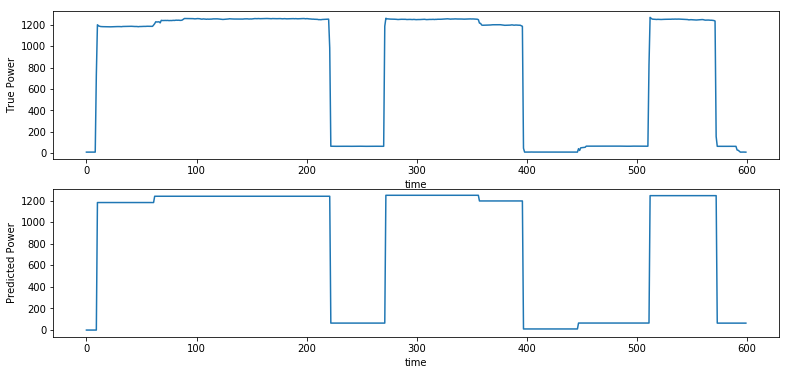

In [17]:
#%% Hair Dryer & Television
composite_signal = appliances.classA.composite('data/D_TV2.csv')
print ('SVM:')
composite_signal.disaggrate(svc)
#print ('Naive Bayes:')
#composite_signal.disaggrate(gnb)

initialize Class A composite signals...


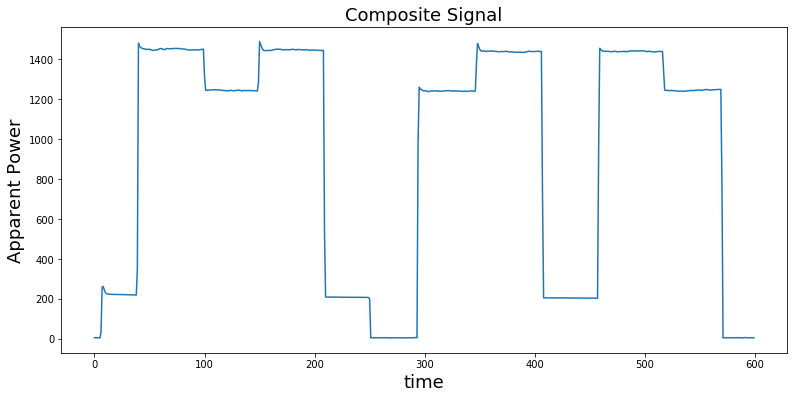

Naive Bayes:
at t = 6 Switched ON: ['Vent Hood']
at t = 39 Switched ON: ['Hair Dryer']
at t = 100 Switched OFF: ['Vent Hood']
at t = 149 Switched ON: ['Vent Hood']
at t = 209 Switched OFF: ['Hair Dryer']
at t = 250 Switched OFF: ['Vent Hood']
at t = 294 Switched ON: ['Hair Dryer']
at t = 347 Switched ON: ['Vent Hood']
at t = 407 Switched OFF: ['Hair Dryer']
at t = 458 Switched ON: ['Hair Dryer']
at t = 517 Switched OFF: ['Vent Hood']
at t = 570 Switched OFF: ['Hair Dryer']
filename       precision      recall         f1-score       
data/D_V.csv   0.988392       0.988333       0.988315       


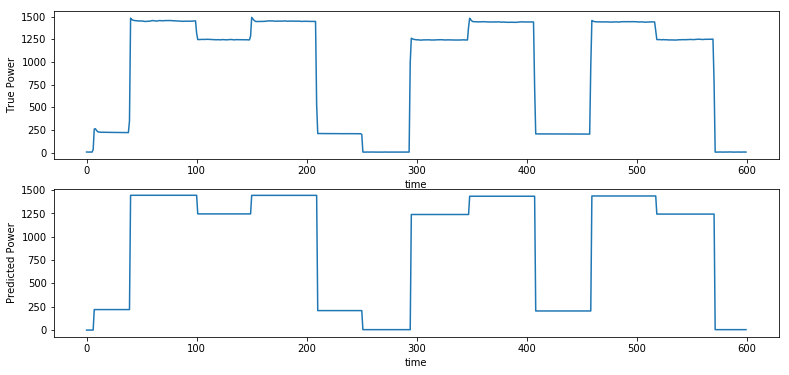

In [18]:
#%% Vent Hood & Hair Dryer
composite_signal = appliances.classA.composite('data/D_V.csv')
#print ('SVM:')
#composite_signal.disaggrate(svc)
print ('Naive Bayes:')
composite_signal.disaggrate(gnb)